### 0852617 統計所 曾鈺評  機器學習 HW01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\Yuping\\HW_Machine_Learning\\HW1\\"
file_name = "testfile.txt"

In [3]:
rawdata = []
with open(path + file_name, 'r') as file:
    for line in file:
        rawdata.extend(line.split('\n')[0].split(','))
rawdata = np.asarray(rawdata).astype(float).reshape(-1,2)
x_data = rawdata[:,0:1]
y_data = rawdata[:,1:]
#rawdata

In [4]:
def SSE(fitted_value, y):
    return sum((fitted_value - y)**2)

In [5]:
def LU_decomposition(matrix):
    L = IdentityMatrix(matrix.shape[0])
    for j in range(matrix.shape[1]):
        for i in range(j+1, matrix.shape[0]):
            ratio = matrix[i][j] / matrix[j][j]
            matrix[i] -= ratio * matrix[j] 
            L[i][j] = ratio
            #print(ratio)
    return L, matrix

In [6]:
# sole y in Ly=b using forward substitution for every column
def forward_substitution(L, b):
    y = np.zeros((L.shape[1], b.shape[0]))
    for j in range(y.shape[1]):
        y_temp = np.zeros((L.shape[1],1))
        for i in range(y.shape[0]):
            y[i][j] = (b[i][j] - Multiplication(L[i:i+1,:], y_temp)) / L[i][i]
            y_temp[i] = y[i][j]
    return y

# sole x in Ux=y using forward substitution for every column
def backward_substitution(U, y):
    x = np.zeros((U.shape[1], y.shape[0]))
    for j in range(x.shape[1]):
        x_temp = np.zeros((U.shape[1],1))
        for i in range(x.shape[0]-1, -1, -1):
            x[i][j] = (y[i][j] - Multiplication(U[i:i+1,:], x_temp)) / U[i][i]
            x_temp[i] = x[i][j]
    return x

In [7]:
def Inverse(matrix):
    L, U = LU_decomposition(matrix)
    y = forward_substitution(L, IdentityMatrix(L.shape[0]))
    x = backward_substitution(U, y)
    return x

In [8]:
def Transpose(matrix):
#     for i in range(matrix.shape[0]):
#         for j in range(matrix.shape[1]):
#             matrix_trans[j][i] = matrix[i][j]
    matrix_trans = [[matrix[i][j] for i in range(matrix.shape[0])] 
                                  for j in range(matrix.shape[1])]
    return np.array(matrix_trans)

In [9]:
def IdentityMatrix(rank):
    I = np.zeros((rank, rank))
    for i in range(rank):
        I[i][i] = 1
    return I

In [10]:
def Multiplication(matrix1, matrix2):
    #matrix_new = np.zeros((matrix1.shape[0], matrix2.shape[1]))
    nrow = matrix1.shape[0]
    ncol = matrix2.shape[1]
    iters = matrix1.shape[1]
    
    matrix_new = [[sum([matrix1[i][k]*matrix2[k][j] for k in range(iters)]) for j in range(ncol)] for i in range(nrow)]
    return np.array(matrix_new)

In [11]:
n = int(input("Please enter the number of polynomial bases n = "))
lda = int(input("Please enter the lambda = "))

Please enter the number of polynomial bases n = 3
Please enter the lambda = 10000


In [12]:
A = np.zeros(shape=(x_data.shape[0], n))
for i in range(n):
    A[:,i:i+1] = x_data**(n-i-1)
#ATA_inverse_lda = np.linalg.inv(Multiplication(Transpose(A), A) + lda*IdentityMatrix(n))
ATA_inv_lse = Inverse(Multiplication(Transpose(A), A) + lda*IdentityMatrix(n))
ATb = Multiplication(Transpose(A), y_data)
b_lse = Multiplication(ATA_inv_lse, ATb)
predict_lse = Multiplication(A, b_lse)
# b_lse
# predict_lse

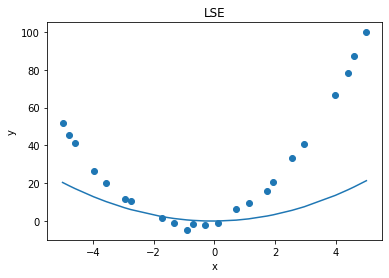

In [13]:
plt.scatter(x_data, y_data)
plt.plot(x_data, predict_lse)
plt.xlabel("x")
plt.ylabel("y")
plt.title("LSE")
plt.show()

In [14]:
ATA_inv_newton = Inverse(Multiplication(Transpose(A), A))
ATb = Multiplication(Transpose(A), y_data)
b_newton = Multiplication(ATA_inv_newton, ATb)
predict_newton = Multiplication(A, b_newton)
# b_newton
# predict_newton

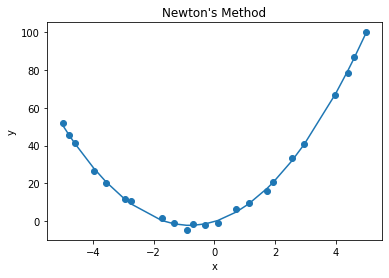

In [15]:
plt.scatter(x_data, y_data)
plt.plot(x_data, predict_newton)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Newton's Method")
plt.show()

In [16]:
print("LSE: \nFitting line: ", end='')
for i in range(len(b_lse)):
    if i != (len(b_lse)-1):
        print("%.10f X^%s " %(b_lse[i], n-i-1), end='')
        if b_lse[i+1] > 0:
            print('+ ', end='')
    else:
        print(b_lse[i])
print("Total error: %.10f\n" %SSE(predict_lse, y_data))


print("Newton's Method: \nFitting line: ", end='')
for i in range(len(b_newton)):
    if i != (len(b_newton)-1):
        print("%.10f X^%s " %(b_newton[i], n-i-1), end='')
        if b_newton[i+1] > 0:
            print('+ ', end='')
    else:
        print(b_newton[i])
print("Total error: %.10f" %SSE(predict_newton, y_data))

LSE: 
Fitting line: 0.8345332827 X^2 + 0.0931481983 X^1 + [0.0469507]
Total error: 22649.7384930242

Newton's Method: 
Fitting line: 3.0238533935 X^2 + 4.9061902639 X^1 [-0.23140176]
Total error: 26.5599594993
